In [2]:
# importing all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
results = pd.read_csv("OneDrive/Desktop/f1 data analysis/results.csv")
races = pd.read_csv("OneDrive/Desktop/f1 data analysis/races.csv")
drivers = pd.read_csv("OneDrive/Desktop/f1 data analysis/drivers.csv")
constructors = pd.read_csv("OneDrive/Desktop/f1 data analysis/constructor.csv")

In [4]:
print(results.columns)
print(races.columns)

Index(['resultId', 'raceID', 'driverID', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'fastestLap', 'Rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId'],
      dtype='object')
Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')


In [5]:
results.rename(columns={'raceID': 'raceId'}, inplace=True)
results.rename(columns={'driverID': 'driverId'}, inplace=True)

In [6]:
print(results.columns)
print(races.columns)

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'fastestLap', 'Rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId'],
      dtype='object')
Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')


In [7]:
df= pd.merge(results,races[['raceId','year','name','round']],on='raceId',how='left')
df= pd.merge(df,drivers[['driverId','driverRef','nationality']],on='driverId',how='left')
df= pd.merge(df,constructors[['constructorId','name','nationality']],on='constructorId',how='left')

In [8]:
%whos

Variable       Type         Data/Info
-------------------------------------
constructors   DataFrame        constructorId constru<...>enetton     Italian   NaN
df             DataFrame           resultId  raceId  <...>[25840 rows x 24 columns]
drivers        DataFrame         driverId        driv<...>n\n[857 rows x 8 columns]
np             module       <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
pd             module       <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>
plt            module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
races          DataFrame          raceId  year  round<...>n[1102 rows x 18 columns]
results        DataFrame           resultId  raceId  <...>[25840 rows x 17 columns]
sns            module       <module 'seaborn' from 'c<...>s\\seaborn\\__init__.py'>


In [9]:
df.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,01:27.4,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,01:27.7,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMWSauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,01:28.0,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,01:28.6,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,01:27.4,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [10]:
#renaming the required columns
df.rename(columns={'name_x':'circit_name','name_y':'constructor_name','nationality_y':'driver_nationality'},inplace=True)

In [11]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,circit_name,round,driverRef,nationality_x,constructor_name,driver_nationality
0,1,18,1,1,22,1,1,1,1,10.0,...,01:27.4,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,01:27.7,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMWSauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,01:28.0,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,01:28.6,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,01:27.4,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [12]:
df.rename(columns={'driver_nationality':'constructor_nationality','nationality_x':'driver_nationality'},inplace=True)

In [13]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,circit_name,round,driverRef,driver_nationality,constructor_name,constructor_nationality
0,1,18,1,1,22,1,1,1,1,10.0,...,01:27.4,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,01:27.7,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMWSauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,01:28.0,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,01:28.6,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,01:27.4,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British


In [14]:
#rearraning the columnas

df=df[['year','circit_name','round','driverId','driverRef','constructor_name','grid','positionOrder','points','fastestLap','fastestLapTime','fastestLapSpeed','statusId','driver_nationality','constructor_nationality']]

In [15]:
df.head(10)

,year,circit_name,round,driverId,driverRef,constructor_name,grid,positionOrder,points,fastestLap,fastestLapTime,fastestLapSpeed,statusId,driver_nationality,constructor_nationality
0,2008,Australian Grand Prix,1,1,hamilton,McLaren,1,1,10.0,39,01:27.4,218.300,1,British,British
1,2008,Australian Grand Prix,1,2,heidfeld,BMWSauber,5,2,8.0,41,01:27.7,217.586,1,German,German
2,2008,Australian Grand Prix,1,3,rosberg,Williams,7,3,6.0,41,01:28.0,216.719,1,German,British
3,2008,Australian Grand Prix,1,4,alonso,Renault,11,4,5.0,58,01:28.6,215.464,1,Spanish,French
4,2008,Australian Grand Prix,1,5,kovalainen,McLaren,3,5,4.0,43,01:27.4,218.385,1,Finnish,British
5,2008,Australian Grand Prix,1,6,nakajima,Williams,13,6,3.0,50,01:29.6,212.974,11,Japanese,British
6,2008,Australian Grand Prix,1,7,bourdais,Toro Roso,17,7,2.0,22,01:29.5,213.224,5,French,Italian
7,2008,Australian Grand Prix,1,8,raikkonen,Ferrari,15,8,1.0,20,01:27.9,217.180,5,Finnish,Italian
8,2008,Australian Grand Prix,1,9,kubica,BMWSauber,2,9,0.0,15,01:28.7,215.100,4,Polish,German
9,2008,Australian Grand Prix,1,10,glock,Toyota,18,10,0.0,23,01:29.5,213.166,3,German,Japanese


In [16]:
#droping the inconsistent data
df=df[df['year']!=2019]

In [17]:
#sorting the data by year and round and position order
df=df.sort_values(by=['year','round','positionOrder'],ascending=[False,True,True])

In [18]:
df.head(10)

,year,circit_name,round,driverId,driverRef,constructor_name,grid,positionOrder,points,fastestLap,fastestLapTime,fastestLapSpeed,statusId,driver_nationality,constructor_nationality
25400,2022,Bahrain Grand Prix,1,844,leclerc,Ferrari,1,1,26.0,51,01:34.5,206.018,1,Monegasque,Italian
25401,2022,Bahrain Grand Prix,1,832,sainz,Ferrari,3,2,18.0,52,01:35.7,203.501,1,Spanish,Italian
25402,2022,Bahrain Grand Prix,1,1,hamilton,NaN,5,3,15.0,53,01:36.2,202.469,1,British,NaN
25403,2022,Bahrain Grand Prix,1,847,russell,NaN,9,4,12.0,56,01:36.3,202.313,1,British,NaN
25404,2022,Bahrain Grand Prix,1,825,kevin_magnussen,NaN,7,5,10.0,53,01:36.6,201.641,1,Danish,NaN
25405,2022,Bahrain Grand Prix,1,822,bottas,NaN,6,6,8.0,53,01:36.5,201.691,1,Finnish,NaN
25406,2022,Bahrain Grand Prix,1,839,ocon,NaN,11,7,6.0,53,01:37.1,200.630,1,French,NaN
25407,2022,Bahrain Grand Prix,1,852,tsunoda,NaN,16,8,4.0,53,01:37.1,200.642,1,Japanese,NaN
25408,2022,Bahrain Grand Prix,1,4,alonso,NaN,8,9,2.0,44,01:36.7,201.412,1,Spanish,NaN
25409,2022,Bahrain Grand Prix,1,855,zhou,NaN,15,10,1.0,39,01:36.6,201.512,1,Chinese,NaN


In [20]:
df.fastestlapspeed = df.fastestLapSpeed.astype(float)


C:\Users\balis\AppData\Local\Temp\ipykernel_17688\3230816248.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.fastestlapspeed = df.fastestLapSpeed.astype(float)


In [21]:
#RESTING THE INDEX
df.reset_index(drop=True,inplace=True)

In [22]:
#CHECKING THE SHAPE OF THE DATASETS 
print(df.shape)

(25420, 15)


In [23]:
df.info

<bound method DataFrame.info of        year         circit_name  round  driverId        driverRef  \
0      2022  Bahrain Grand Prix      1       844          leclerc   
1      2022  Bahrain Grand Prix      1       832            sainz   
2      2022  Bahrain Grand Prix      1         1         hamilton   
3      2022  Bahrain Grand Prix      1       847          russell   
4      2022  Bahrain Grand Prix      1       825  kevin_magnussen   
...     ...                 ...    ...       ...              ...   
25415  1950  Italian Grand Prix      7       763           sanesi   
25416  1950  Italian Grand Prix      7       626           manzon   
25417  1950  Italian Grand Prix      7       669             bira   
25418  1950  Italian Grand Prix      7       756          pietsch   
25419  1950  Italian Grand Prix      7       697          bonetto   

      constructor_name  grid  positionOrder  points  fastestLap  \
0              Ferrari     1              1    26.0          51   
1    

In [24]:
df.head(10)

,year,circit_name,round,driverId,driverRef,constructor_name,grid,positionOrder,points,fastestLap,fastestLapTime,fastestLapSpeed,statusId,driver_nationality,constructor_nationality
0,2022,Bahrain Grand Prix,1,844,leclerc,Ferrari,1,1,26.0,51,01:34.5,206.018,1,Monegasque,Italian
1,2022,Bahrain Grand Prix,1,832,sainz,Ferrari,3,2,18.0,52,01:35.7,203.501,1,Spanish,Italian
2,2022,Bahrain Grand Prix,1,1,hamilton,NaN,5,3,15.0,53,01:36.2,202.469,1,British,NaN
3,2022,Bahrain Grand Prix,1,847,russell,NaN,9,4,12.0,56,01:36.3,202.313,1,British,NaN
4,2022,Bahrain Grand Prix,1,825,kevin_magnussen,NaN,7,5,10.0,53,01:36.6,201.641,1,Danish,NaN
5,2022,Bahrain Grand Prix,1,822,bottas,NaN,6,6,8.0,53,01:36.5,201.691,1,Finnish,NaN
6,2022,Bahrain Grand Prix,1,839,ocon,NaN,11,7,6.0,53,01:37.1,200.630,1,French,NaN
7,2022,Bahrain Grand Prix,1,852,tsunoda,NaN,16,8,4.0,53,01:37.1,200.642,1,Japanese,NaN
8,2022,Bahrain Grand Prix,1,4,alonso,NaN,8,9,2.0,44,01:36.7,201.412,1,Spanish,NaN
9,2022,Bahrain Grand Prix,1,855,zhou,NaN,15,10,1.0,39,01:36.6,201.512,1,Chinese,NaN


In [27]:
import seaborn as sb
sb.set_palette('viridis')
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

([], [])

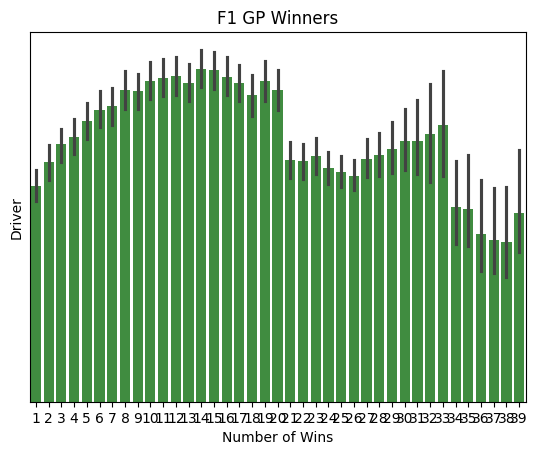

In [63]:
#GP winners by
winners = df.loc[df['positionOrder']==1].groupby('driverId')['positionOrder']. count().sort_values(ascending=False).to_frame().reset_index()

#BAR PLOT
sb.barplot(data=results,x='positionOrder',y='driverId',color='green', alpha=0.8)
plt.title('F1 GP Winners')
plt.ylabel('Driver')
plt.xlabel('Number of Wins')
plt.yticks([])

In [38]:
#creating anew dataframe of top ten winners
top_ten_winners = winners.head(10)

print(top_ten_winners)

   driverId  positionOrder
0         1             92
1        30             91
2        20             52
3       117             51
4       102             41
5         4             32
6       830             32
7        95             31
8       328             27
9       182             25


Text(0.5, 0, 'Driver')

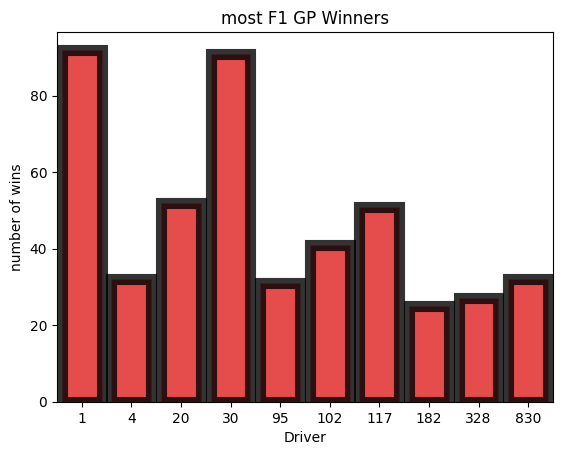

In [41]:
#barplot for top 10 drivers
sb.barplot(data=top_ten_winners,x='driverId',y='positionOrder',color='Red', alpha=0.8, linewidth=8,edgecolor='black')
plt.title('most F1 GP Winners')
plt.ylabel('number of wins')
plt.xlabel('Driver')

In [42]:
constructors.head()


,constructorId,constructorref,name,nationality,url\
0,1,mclaren,McLaren,British,NaN
1,2,bmw_sauber,BMWSauber,German,NaN
2,3,williams,Williams,British,NaN
3,4,renault,Renault,French,NaN
4,5,toro_roso,Toro Roso,Italian,NaN


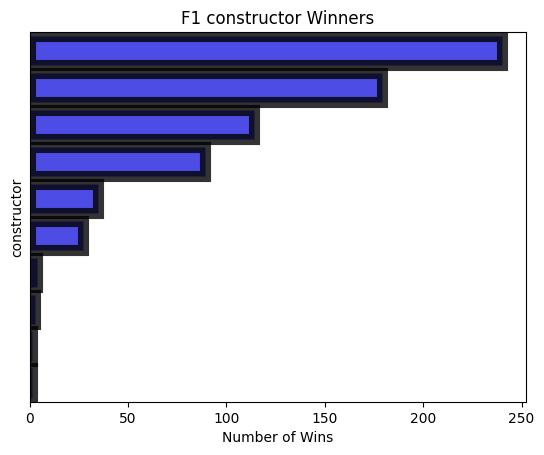

In [46]:
constructor_winner = df.loc[df['positionOrder']==1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

sb.barplot(data=constructor_winner,x='positionOrder',y='constructor_name',color='blue', alpha=0.8, linewidth=8,edgecolor='black')
plt.title('F1 constructor Winners')
plt.ylabel('constructor')
plt.xlabel('Number of Wins')
plt.yticks([]);     

Text(0, 0.5, 'constructor')

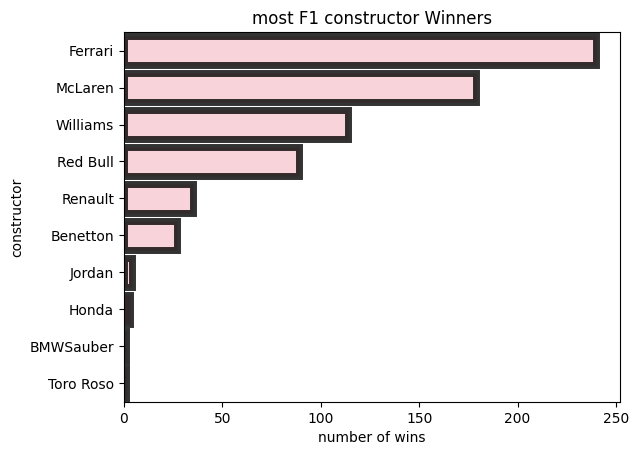

In [51]:
sb.barplot(data=constructor_winner,y='constructor_name',x='positionOrder',color='pink', alpha=0.8, linewidth=5,edgecolor='black')
plt.title('most F1 constructor Winners')
plt.xlabel('number of wins')
plt.ylabel('constructor')

Text(0, 0.5, 'Ending Position')

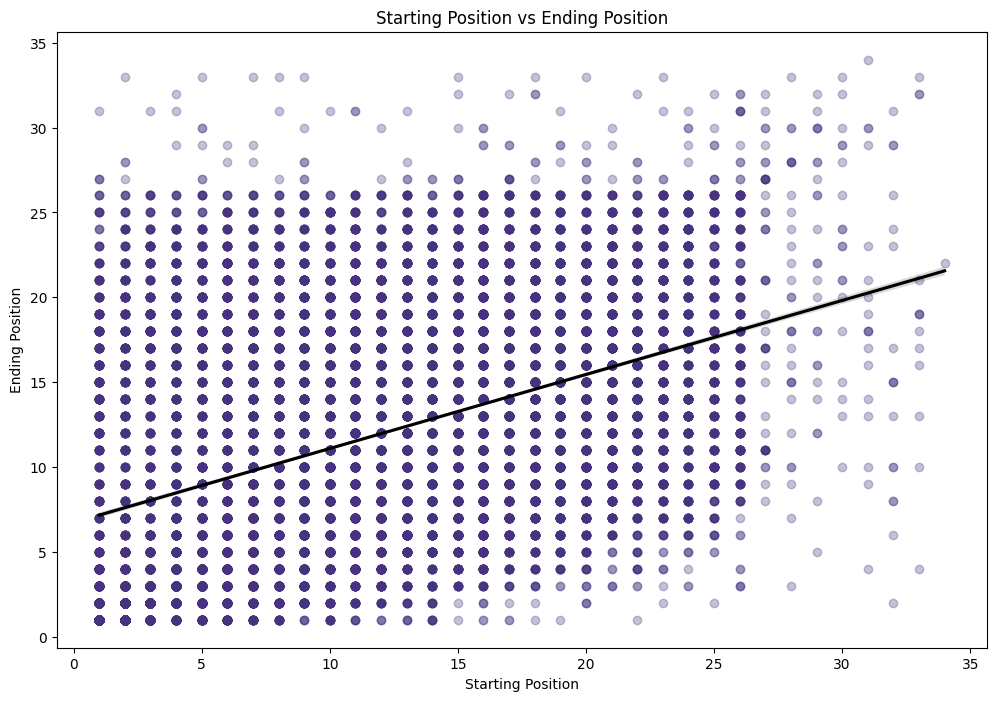

In [54]:
#using regression we are gonna show who a styarting and end position is

df_no_zero = df[df['grid']!=0]

#creating a plot

plt.figure(figsize=(12,8))
sns.regplot(data=df_no_zero,x='grid',y='positionOrder',scatter_kws={'alpha':0.3},line_kws={'color':'black'})
plt.title('Starting Position vs Ending Position')
plt.xlabel('Starting Position')
plt.ylabel('Ending Position')   

Text(0.5, 0.98, 'Average Speed Over the Years')

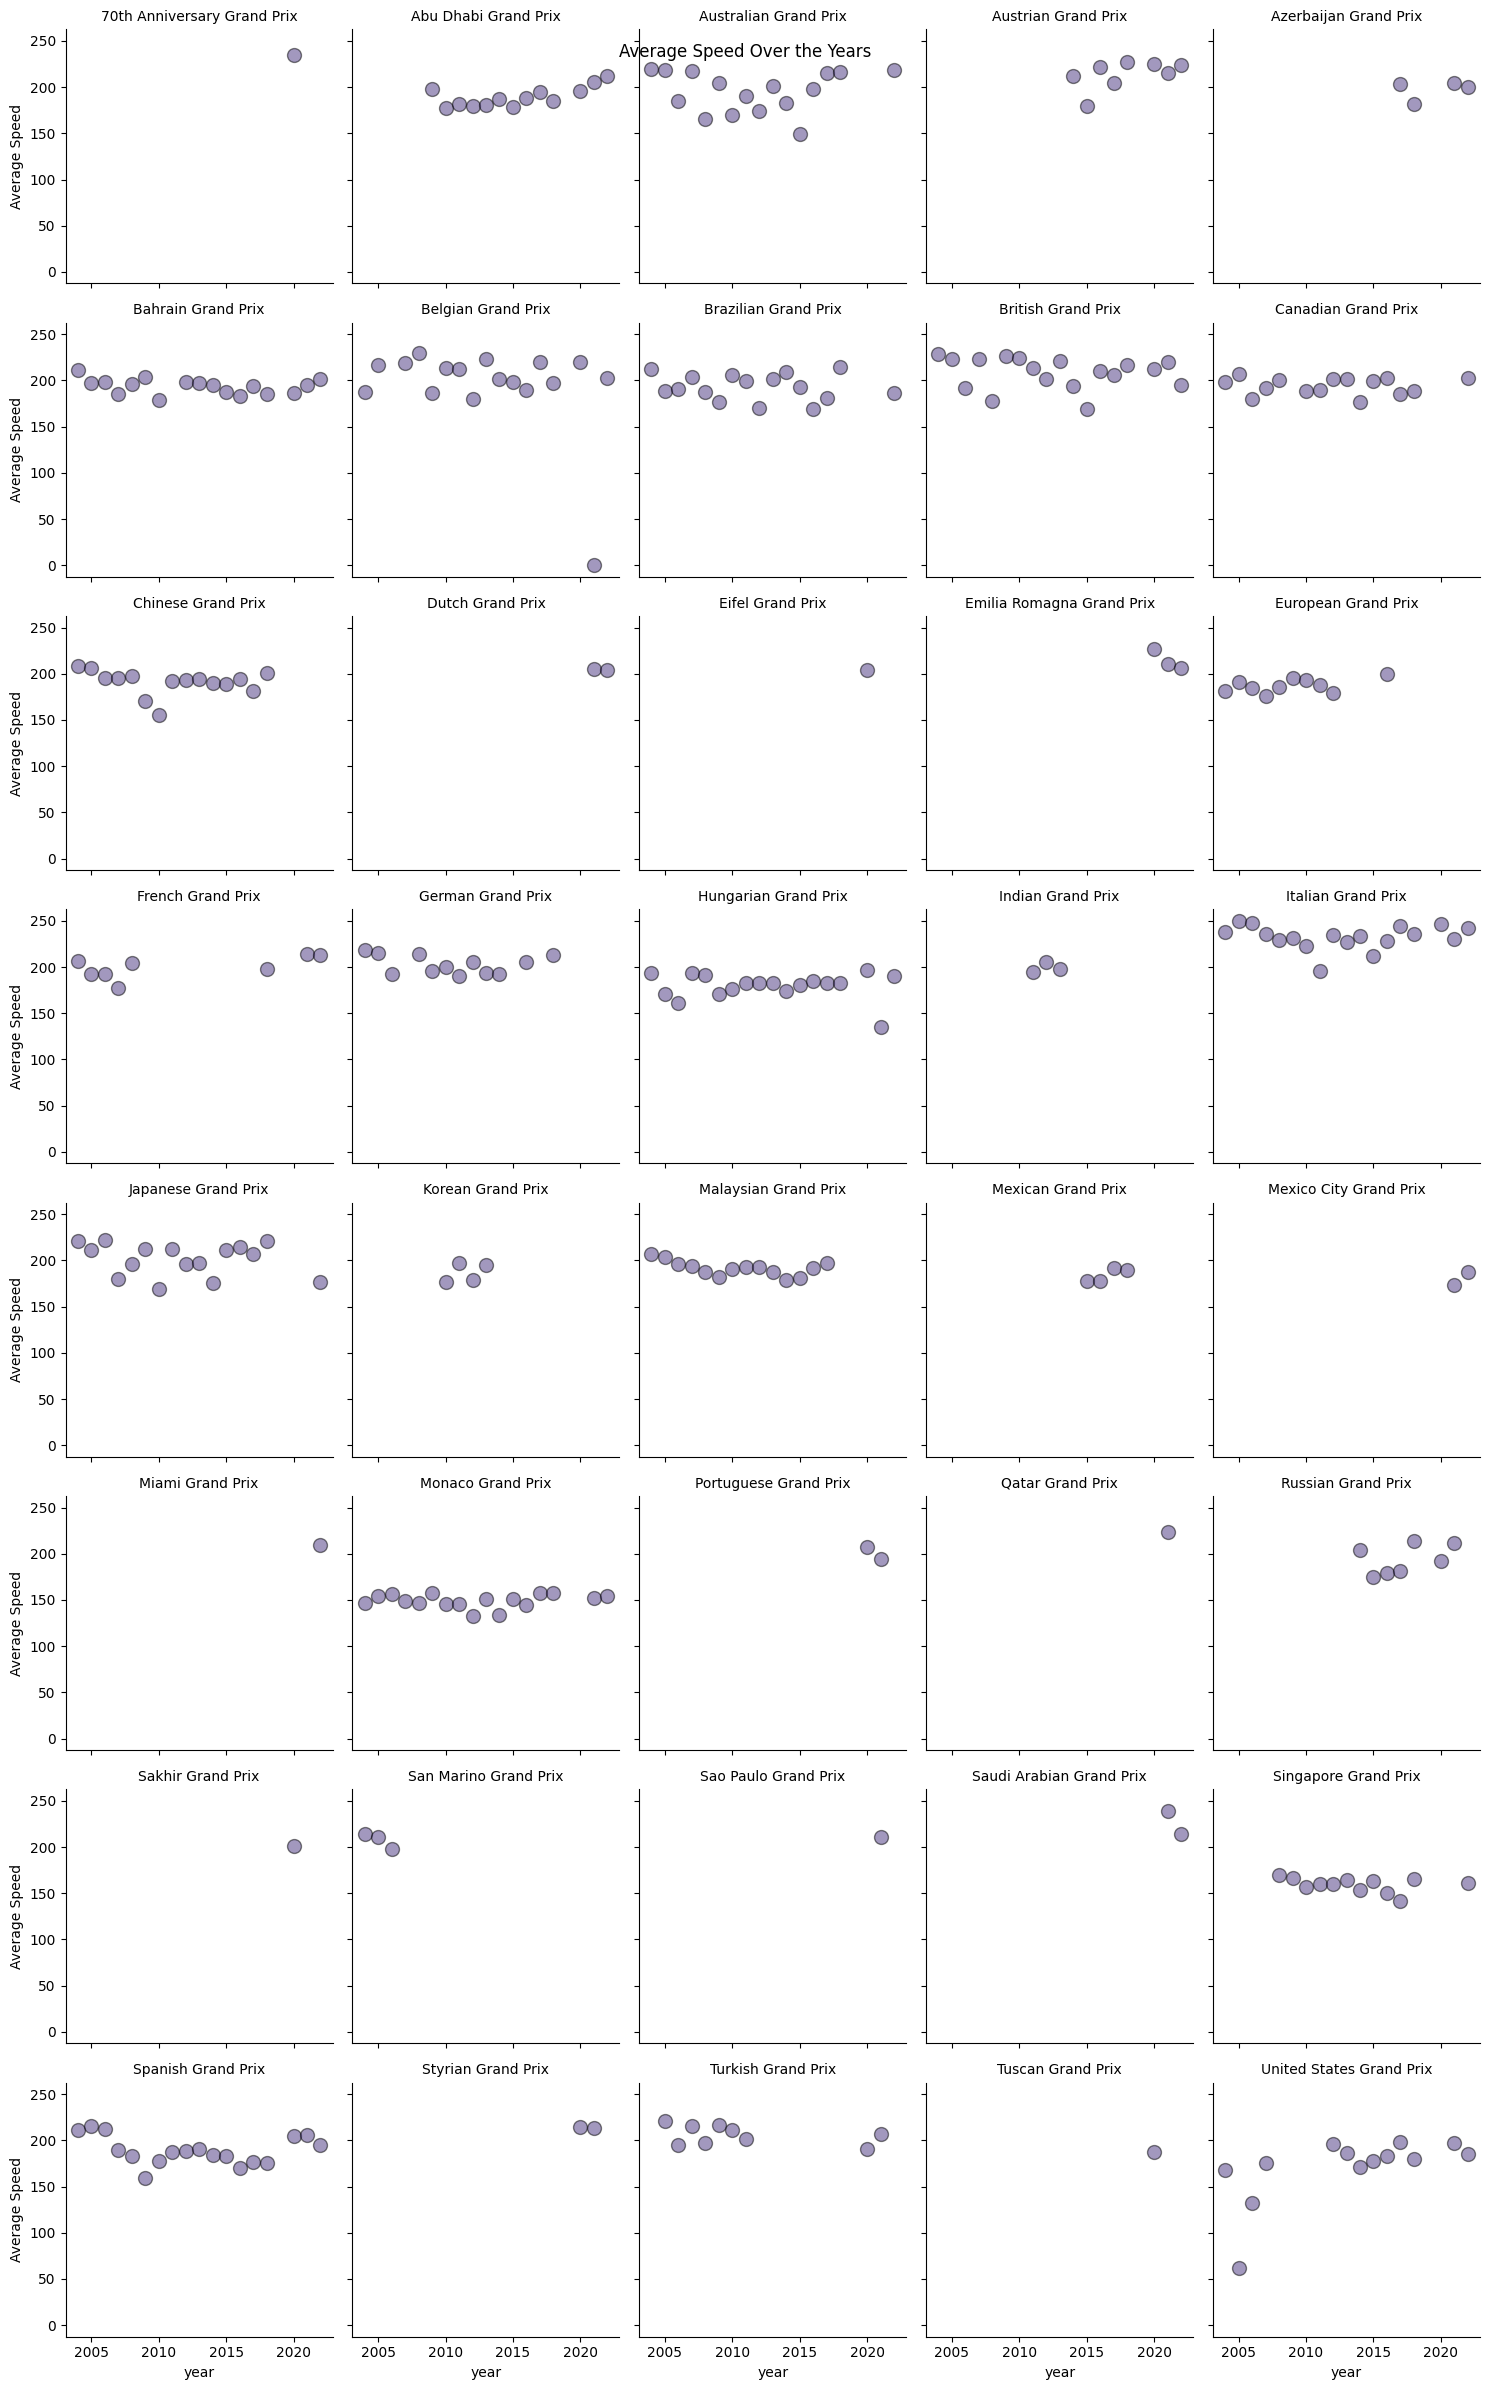

In [61]:
#checking thespeed of thecars over the years 
#creating new data frame 
df_speed=df[df['year']>=2004]
df_group_speed = df_speed.groupby(['circit_name','year'])['fastestLapSpeed'].mean().to_frame().reset_index()

g= sns.FacetGrid(data=df_group_speed,col='circit_name',col_wrap=5)
g.map(plt.scatter,'year','fastestLapSpeed',alpha=0.5,edgecolor='black',s=100)
g.set_titles('{col_name}')
g.set_xlabels('year')
g.set_ylabels('Average Speed')

g.fig.suptitle('Average Speed Over the Years')